In [6]:
!pip install -q datasets

In [7]:
from datasets import load_dataset
import pandas as pd

In [8]:
dataset_dict = load_dataset("ailsntua/QEvasion")

train_ds = dataset_dict["train"]
test_ds  = dataset_dict["test"]

print(train_ds)
print(train_ds.column_names)

Dataset({
    features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
    num_rows: 3448
})
['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label']


In [9]:
train_ds = train_ds.remove_columns(["title", "date", "url", "annotator_id", "annotator1", "annotator2", "annotator3"])


In [11]:
train_df = train_ds.to_pandas()
train_df.head()

,president,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label
0,Joseph R. Biden,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,False,False,False,0,Clear Reply,Explicit
1,Joseph R. Biden,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,False,False,False,1,Ambivalent,General
2,Joseph R. Biden,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,False,False,False,2,Ambivalent,Partial/half-answer
3,Joseph R. Biden,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,False,False,False,3,Ambivalent,Dodging
4,Joseph R. Biden,3,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,False,False,False,4,Clear Reply,Explicit


In [12]:
test_ds = test_ds.remove_columns(
    ["title", "date", "url", "annotator_id", "annotator1", "annotator2", "annotator3"]
)

test_df = test_ds.to_pandas()
test_df.head()

,president,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label
0,None,5,"Q. What about the redline, sir?","Well, the world has made it clear that these t...",None,None,Inquiring about the status or information reg...,False,False,True,0,Ambivalent,
1,None,2,Q. Will you invite them to the White House to ...,I think that anytime and anyplace that they ar...,None,None,Will you invite them to the White House to neg...,False,False,False,1,Ambivalent,
2,None,1,"Q. Harsh. Mr. President, Japan has dropped the...",I think that the purpose of the U.N. Security ...,None,None,Why was it necessary for Japan to drop the thr...,False,False,False,2,Ambivalent,
3,None,2,Q. The Lebanese Prime Minister is demanding a ...,I'll let Condi talk about the details of what ...,None,None,When will we see this resolution?,False,False,False,3,Ambivalent,
4,None,7,"Q. Thank you, Mr. President. Back on Iraq, a g...","No, I don't consider it a credible report; nei...",None,None,Updating the figure of Iraqi deaths,False,False,True,4,Ambivalent,


In [25]:
if "index" in train_df.columns:
    train_df = train_df.drop(columns=["index"])

In [26]:
train_df.shape

(3448, 16)

In [27]:
test_df.shape

(308, 15)

In [15]:
train_df.isna().sum()

,0
president,0
question_order,0
interview_question,0
interview_answer,0
gpt3.5_summary,0
gpt3.5_prediction,0
question,0
inaudible,0
multiple_questions,0
affirmative_questions,0


In [16]:
train_df["clarity_label"].value_counts()

,count
clarity_label,
Ambivalent,2040
Clear Reply,1052
Clear Non-Reply,356


In [17]:
train_df["evasion_label"].value_counts()

,count
evasion_label,
Explicit,1052
Dodging,706
Implicit,488
General,386
Deflection,381
Declining to answer,145
Claims ignorance,119
Clarification,92
Partial/half-answer,79


In [48]:
cross = pd.crosstab(train_df["clarity_label"], train_df["evasion_label"], normalize="index") * 100
cross

evasion_label,Claims ignorance,Clarification,Declining to answer,Deflection,Dodging,Explicit,General,Implicit,Partial/half-answer
clarity_label,,,,,,,,,
Ambivalent,0.000000,0.000000,0.000000,18.676471,34.607843,0.0,18.921569,23.921569,3.872549
Clear Non-Reply,33.426966,25.842697,40.730337,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Clear Reply,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

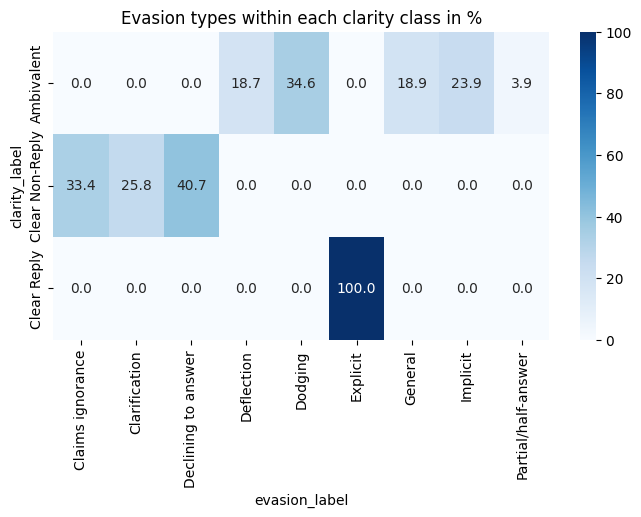

In [50]:
plt.figure(figsize=(8,4))
sns.heatmap(cross, annot=True, fmt=".1f", cmap="Blues")
plt.title("Evasion types within each clarity class in %")
plt.show()

In [18]:
clarity_labels = sorted(train_df["clarity_label"].unique())
clarity_label2id = {lbl: i for i, lbl in enumerate(clarity_labels)}
clarity_id2label = {i: lbl for lbl, i in clarity_label2id.items()}

train_df["clarity_id"] = train_df["clarity_label"].map(clarity_label2id)
test_df["clarity_id"]  = test_df["clarity_label"].map(clarity_label2id)

In [19]:
evasion_labels = sorted(train_df["evasion_label"].unique())
evasion_label2id = {lbl: i for i, lbl in enumerate(evasion_labels)}
evasion_id2label = {i: lbl for lbl, i in evasion_label2id.items()}

train_df["evasion_id"] = train_df["evasion_label"].map(evasion_label2id)
test_df["evasion_id"]  = test_df["evasion_label"].map(evasion_label2id)

In [20]:
train_df.head()

,president,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label,clarity_id,evasion_id
0,Joseph R. Biden,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,False,False,False,0,Clear Reply,Explicit,2,5
1,Joseph R. Biden,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,False,False,False,1,Ambivalent,General,0,6
2,Joseph R. Biden,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,False,False,False,2,Ambivalent,Partial/half-answer,0,8
3,Joseph R. Biden,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,False,False,False,3,Ambivalent,Dodging,0,4
4,Joseph R. Biden,3,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,False,False,False,4,Clear Reply,Explicit,2,5


In [21]:
train_df["q_len"] = train_df["question"].str.split().str.len()
train_df[["q_len"]].describe()

,q_len
count,3448.000000
mean,14.462007
std,8.833190
min,1.000000
25%,8.000000
50%,12.000000
75%,19.000000
max,80.000000


In [22]:
train_df["a_len"] = train_df["interview_answer"].str.split().str.len()
train_df[["a_len"]].describe()

,a_len
count,3448.000000
mean,293.572216
std,301.541101
min,1.000000
25%,56.000000
50%,207.000000
75%,440.000000
max,2117.000000


In [23]:
train_df.head()

,president,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label,clarity_id,evasion_id,q_len,a_len
0,Joseph R. Biden,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,False,False,False,0,Clear Reply,Explicit,2,5,19,359
1,Joseph R. Biden,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,False,False,False,1,Ambivalent,General,0,6,21,359
2,Joseph R. Biden,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,False,False,False,2,Ambivalent,Partial/half-answer,0,8,25,219
3,Joseph R. Biden,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,False,False,False,3,Ambivalent,Dodging,0,4,26,219
4,Joseph R. Biden,3,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,False,False,False,4,Clear Reply,Explicit,2,5,14,444


In [24]:
train_df.groupby("clarity_label")[["q_len", "a_len"]].mean()

,q_len,a_len
clarity_label,,
Ambivalent,15.300980,331.857843
Clear Non-Reply,12.632022,137.806180
Clear Reply,13.454373,272.041825


In [28]:
def build_qa(row):
    return f"Question: {row['question']} Answer: {row['interview_answer']}"

In [29]:
train_df["qa_text"] = train_df.apply(build_qa, axis=1)

In [30]:
train_df[["qa_text", "clarity_label", "evasion_label"]].head()

,qa_text,clarity_label,evasion_label
0,Question: How would you respond to the accusat...,Clear Reply,Explicit
1,Question: Do you think President Xi is being s...,Ambivalent,General
2,Question: Do you believe the country's slowdo...,Ambivalent,Partial/half-answer
3,Question: Are you worried about the meeting b...,Ambivalent,Dodging
4,Question: Is the President's engagement with ...,Clear Reply,Explicit


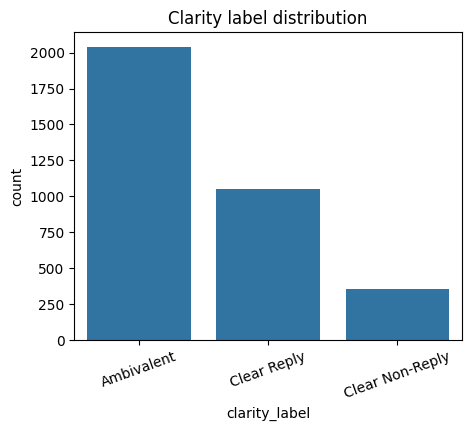

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_df, x="clarity_label",
              order=train_df["clarity_label"].value_counts().index)
plt.title("Clarity label distribution")
plt.xticks(rotation=20)
plt.show()

In [33]:
print(train_df["clarity_label"].value_counts(normalize=True))

clarity_label
Ambivalent         0.591647
Clear Reply        0.305104
Clear Non-Reply    0.103248
Name: proportion, dtype: float64


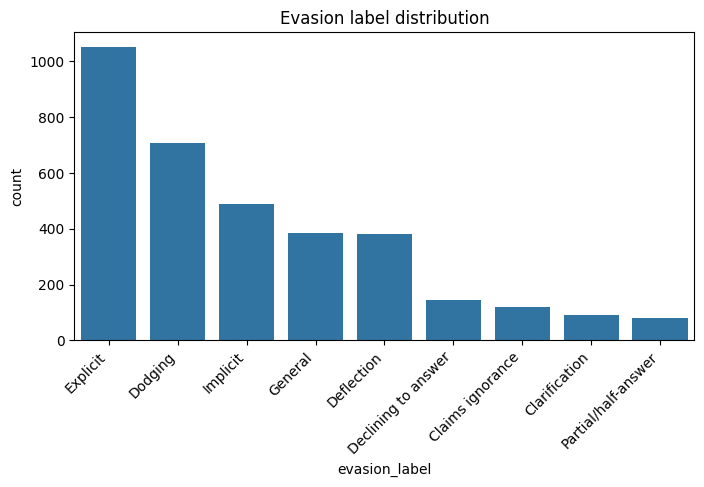

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_df, x="evasion_label",
              order=train_df["evasion_label"].value_counts().index)
plt.title("Evasion label distribution")
plt.xticks(rotation=45, ha="right")
plt.show()

In [35]:
print(train_df["evasion_label"].value_counts(normalize=True))

evasion_label
Explicit               0.305104
Dodging                0.204756
Implicit               0.141531
General                0.111949
Deflection             0.110499
Declining to answer    0.042053
Claims ignorance       0.034513
Clarification          0.026682
Partial/half-answer    0.022912
Name: proportion, dtype: float64


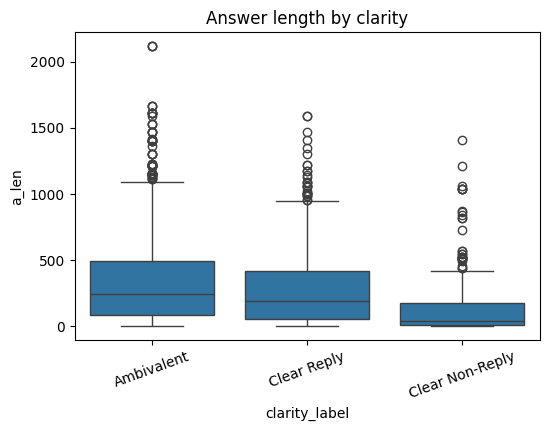

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(data=train_df, x="clarity_label", y="a_len",
            order=train_df["clarity_label"].value_counts().index)
plt.title("Answer length by clarity")
plt.xticks(rotation=20)
plt.show()

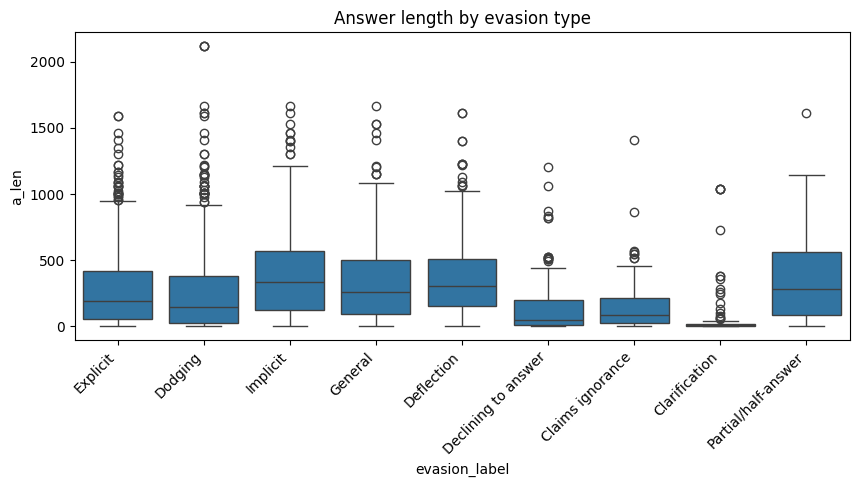

In [37]:
plt.figure(figsize=(10,4))
sns.boxplot(data=train_df, x="evasion_label", y="a_len",
            order=train_df["evasion_label"].value_counts().index)
plt.title("Answer length by evasion type")
plt.xticks(rotation=45, ha="right")
plt.show()


In [38]:
# Clarity by president
pd.crosstab(train_df["president"], train_df["clarity_label"], normalize="index") * 100

clarity_label,Ambivalent,Clear Non-Reply,Clear Reply
president,,,
Barack Obama,68.118812,9.504950,22.376238
Donald J. Trump,55.622642,11.773585,32.603774
George W. Bush,57.002801,8.683473,34.313725
Joseph R. Biden,52.130326,10.526316,37.343358


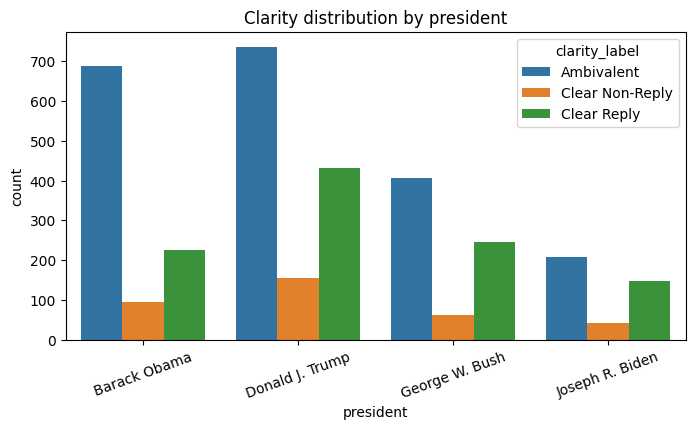

In [39]:
clarity_by_pres = (
    train_df.groupby(["president", "clarity_label"])
            .size()
            .reset_index(name="count")
)

plt.figure(figsize=(8,4))
sns.barplot(data=clarity_by_pres, x="president", y="count",
            hue="clarity_label")
plt.title("Clarity distribution by president")
plt.xticks(rotation=20)
plt.show()


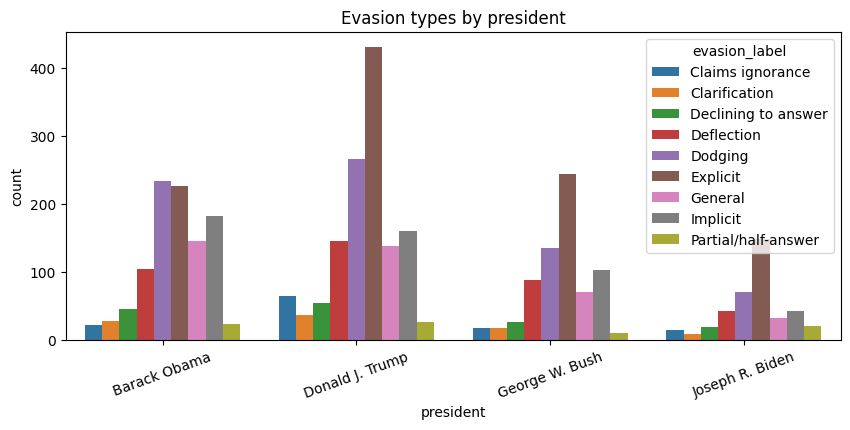

In [40]:
evasion_by_pres = (
    train_df.groupby(["president", "evasion_label"])
            .size()
            .reset_index(name="count")
)

plt.figure(figsize=(10,4))
sns.barplot(data=evasion_by_pres, x="president", y="count",
            hue="evasion_label")
plt.title("Evasion types by president")
plt.xticks(rotation=20)
plt.show()


In [41]:
train_df["inaudible"].value_counts()

,count
inaudible,
False,3403
True,45


In [42]:
train_df["multiple_questions"].value_counts()

,count
multiple_questions,
False,3362
True,86


In [43]:
train_df["affirmative_questions"].value_counts()

,count
affirmative_questions,
False,2676
True,772


In [44]:
pd.crosstab(train_df["inaudible"], train_df["clarity_label"], normalize="index") * 100

clarity_label,Ambivalent,Clear Non-Reply,Clear Reply
inaudible,,,
False,59.153688,10.402586,30.443726
True,60.000000,4.444444,35.555556


In [45]:
pd.crosstab(train_df["multiple_questions"], train_df["clarity_label"], normalize="index") * 100

clarity_label,Ambivalent,Clear Non-Reply,Clear Reply
multiple_questions,,,
False,58.834027,10.410470,30.755503
True,72.093023,6.976744,20.930233


In [46]:
pd.crosstab(train_df["affirmative_questions"], train_df["clarity_label"], normalize="index") * 100

clarity_label,Ambivalent,Clear Non-Reply,Clear Reply
affirmative_questions,,,
False,60.500747,9.603886,29.895366
True,54.533679,12.823834,32.642487
